# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os

    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)
image_prediction=pd.read_csv('image_predictions.tsv',sep='\t')
image_prediction.head()
    


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:

tweet_json=pd.read_json('tweet_json.txt', lines=True)
tweet_json
tweet_data=tweet_json[['id', 'retweet_count','favorite_count']]
tweet_data.head()
tweet_data=tweet_data.rename(columns={'id':'tweet_id'})

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive.info()
twitter_archive.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lou. His sweater is too small and he already cut the tags off. Very very churlish. 10/10 would still pet https://t.co/dZPMLresEr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597686943744/photo/1,10,10,Lou,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tanner. He accidentally dropped all his hard-earned Kohl's cash in the tub. 11/10 https://t.co/onC3uMpFF2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598324076544/photo/1,11,10,Tanner,None,None,None,None
661,791026214425268224,NaN,NaN,2016-10-25 21:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo,7.638376e+17,4.196984e+09,2016-08-11 20:40:41 +0000,"https://twitter.com/dog_rates/status/763837565564780549/photo/1,https://twitter.com/dog_rates/status/763837565564780549/photo/1",11,10,Alfie,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af https://t.co/EkLku795aO",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557239623680/photo/1,10,10,Kayla,None,None,None,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Martha come take a look at this. I'm so fed up with the media's unrealistic portrayal of dogs these days."" 10/10 https://t.co/Sd4qAdSRqI",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574471057408/photo/1,10,10,None,None,None,None,None


In [6]:
image_prediction.info()
image_prediction.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [7]:
tweet_data.head()

tweet_data.info()
tweet_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id          2326 non-null int64
retweet_count     2326 non-null int64
favorite_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


,tweet_id,retweet_count,favorite_count
1133,723688335806480385,2614,6920
736,778408200802557953,3957,12606
233,845812042753855489,7768,26409
2238,667517642048163840,164,326
224,847251039262605312,3862,18503


### Quality issues
1.Datatype 

2.Duplicate data in archive table

3.Replace lowercase name

4.Denominator have 15 at few places

5.Inconsistency in Numerator 

6.Extract data from the Text column 

7.Replace string 'None' to nan

8.Drop columns that are not required

### Tidiness issues
1.Multiple columns with same info in archive table.\
  clean_image: clean columns p1,p2,p3\
  clean_image: clean columns p1_dog,p2_dog,p3_dog\
  clean_image: clean column p1_conf,p2_conf,p3_conf.

2.Each type of observational unit forms a table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [8]:
# Make copies of original pieces of data
clean_archive = twitter_archive.copy()
clean_image = image_prediction.copy()
clean_tweet=tweet_data.copy()



### Issue #1:Data Type

#### Define: Change data type

#### Code

In [9]:
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)

clean_archive['timestamp']=pd.to_datetime(clean_archive['timestamp'])

In [10]:
clean_image.tweet_id = clean_image.tweet_id.astype(str)

clean_tweet.tweet_id = clean_tweet.tweet_id.astype(str)

#### Test

In [11]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [12]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB



### Issue #2:Duplicate data

#### Define twiter_archive remove duplicate data


#### Code

In [13]:
#remove the retweeted rows
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]


#### Test

In [14]:
clean_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### issue#3: Replace lower case name



#### Define: replace the lower case name with none

#### Code

In [15]:
clean_archive.loc[clean_archive['name'] == clean_archive['name'].str.lower(), 'name'] = np.nan



#### Test


In [16]:
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue #4: Denominator is differnt in some places

#### Define:Assign rating_denominator to 10 

#### Code

In [17]:
#set denominator to 10
clean_archive['rating_denominator']=10

#### Test

In [18]:
clean_archive['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue #5: numerator in archive table

#### Define:numrator is different in text column

#### Code

In [19]:
#seprate numerator from the text there is inconsistancy in the numerator column
clean_archive['rating_numerator']=clean_archive.text.str.extract('(\d*\.?\d+)/(10)',expand=True)

#### Test

In [20]:
clean_archive.rating_numerator = clean_archive.rating_numerator.astype(float)
clean_archive.rating_numerator.value_counts()


12.00      498
10.00      434
11.00      422
13.00      308
9.00       153
8.00        97
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
0.10         9
2.00         9
1.00         7
0.11         4
0.90         3
0.12         2
420.00       2
0.00         2
11.27        1
0.13         1
11.26        1
15.00        1
182.00       1
9.50         1
666.00       1
17.00        1
13.50        1
9.75         1
1776.00      1
0.80         1
Name: rating_numerator, dtype: int64

### Issue #6: Extract data from column

#### Define:  Seprate text from URL

#### Code

In [21]:
#seprate text data from the url link
clean_archive['text'] = clean_archive['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


#### Test

In [22]:
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None


### Issue #7: replace string 'None' to nan

#### Define: replace 'None' by nan

#### Code

In [23]:

clean_archive[clean_archive.name =='None']=np.nan



#### Test

In [24]:
clean_archive.name.value_counts()


Lucy            11
Charlie         11
Oliver          10
Cooper          10
Penny            9
Tucker           9
Winston          8
Lola             8
Sadie            8
Toby             7
Daisy            7
Koda             6
Jax              6
Bella            6
Oscar            6
Stanley          6
Bo               6
Bailey           6
Rusty            5
Scout            5
Chester          5
Dave             5
Bentley          5
Louis            5
Milo             5
Leo              5
Buddy            5
Derek            4
Gary             4
Clarence         4
                ..
Jaspers          1
Eugene           1
Nida             1
Orion            1
Jangle           1
Carter           1
Koko             1
Anakin           1
Fabio            1
Darby            1
Georgie          1
Cheryl           1
Pawnd            1
Florence         1
Olaf             1
Godzilla         1
Brian            1
Alexanderson     1
Lambeau          1
Fiji             1
Autumn           1
Bradley     

### Issue #8: Drop the columns

#### Define: drop column which are not required

#### Code

In [25]:

clean_archive=clean_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source','expanded_urls','retweeted_status_id','retweeted_status_user_id',\
                                          'retweeted_status_timestamp','name'])

#### Test

In [26]:
clean_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,None,None,None,None


## Tidiness

### Issue #1:

#### Define:

#### Code:

In [27]:
#select method to create one column out of three
condlist0 =[clean_archive['doggo'] == 'doggo',\
           clean_archive['floofer'] == 'floofer',\
           clean_archive['pupper'] == 'pupper',\
           clean_archive['puppo'] == 'puppo']
choicelist0 = ['doggo', 'floofer', 'pupper', 'puppo']
clean_archive['stage'] = np.select( condlist0, choicelist0, default = 'None')
clean_archive=clean_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#take highest prediction confidance dog type as predicted breed.
condlist=[clean_image['p1_conf']>clean_image['p2_conf'],\
         clean_image['p1_conf']<clean_image['p2_conf']]
choicelist1=[clean_image['p1'],clean_image['p2']]
clean_image['pre_breed']= np.select(condlist,choicelist1,clean_image['p3'])
clean_image=clean_image.drop(columns=['p1','p2','p3'])

#highly confidance true /false value for dog
choicelist2=[clean_image['p1_dog'],clean_image['p2_dog']]
clean_image['isdog']=np.select(condlist,choicelist2,clean_image['p3_dog'])
clean_image=clean_image.drop(columns=['p1_dog','p2_dog','p3_dog'])

#confidance value which is highest of all
choicelist3=[clean_image['p1_conf'],clean_image['p2_conf']]
clean_image['high_conf']=np.select(condlist,choicelist3,clean_image['p3_conf'])
clean_image=clean_image.drop(columns=['p1_conf','p2_conf','p3_conf'])



#### Test:

In [28]:
clean_image.head()

,tweet_id,jpg_url,img_num,pre_breed,isdog,high_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,0.560311


### Issue#2

#### Define

#### Code

In [29]:
#create a master table from all the tables


twitter_archive=pd.merge(clean_archive,clean_image,\
                                on='tweet_id',how='left')
twitter_archive_master=pd.merge(twitter_archive,clean_tweet,\
                                on='tweet_id',how='left')


#### Test

In [30]:
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id              1495 non-null object
timestamp             1495 non-null datetime64[ns]
text                  1495 non-null object
rating_numerator      1492 non-null float64
rating_denominator    1495 non-null float64
stage                 2175 non-null object
jpg_url               1448 non-null object
img_num               1448 non-null float64
pre_breed             1448 non-null object
isdog                 1448 non-null object
high_conf             1448 non-null float64
retweet_count         1488 non-null float64
favorite_count        1488 non-null float64
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 237.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.top 10 favorite dogs and total rank

2.total rating based on dog stage(doggo,pupper etc..)

3.top 10 retweeted dogs and total rank

In [32]:

twitter_archive_master=twitter_archive_master[twitter_archive_master.rating_numerator<100]

result=twitter_archive_master.groupby('pre_breed')['favorite_count',\
                                                     'rating_numerator'].aggregate('sum')
result.sort_values('favorite_count',ascending=False).head(10)



,favorite_count,rating_numerator
pre_breed,,
golden_retriever,1068400.0,1112.50
Pembroke,646827.0,769.11
Labrador_retriever,557435.0,746.00
Chihuahua,478706.0,637.10
French_bulldog,378445.0,252.00
Samoyed,242667.0,289.00
chow,241975.0,396.00
pug,232514.0,424.00
cocker_spaniel,214912.0,228.00


In [33]:

result2=twitter_archive_master[twitter_archive_master.stage!='None'].groupby('stage')['pre_breed','rating_numerator'].aggregate(['count','sum'])
result2


rating_numerator         
                   count      sum
stage                            
doggo                 45   540.00
floofer                5    58.00
pupper               132  1377.27
puppo                 16   189.00

In [34]:
result2=twitter_archive_master.groupby('pre_breed')['retweet_count',\
                                                     'rating_numerator'].aggregate('sum')
result2.sort_values('retweet_count',ascending=False).head(10)

,retweet_count,rating_numerator
pre_breed,,
golden_retriever,288194.0,1112.50
Pembroke,167556.0,769.11
Labrador_retriever,148181.0,746.00
Chihuahua,144354.0,637.10
French_bulldog,91858.0,252.00
Samoyed,77972.0,289.00
cocker_spaniel,68451.0,228.00
pug,68133.0,424.00
toy_poodle,66367.0,354.00


In [35]:

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 2173
Data columns (total 13 columns):
tweet_id              1491 non-null object
timestamp             1491 non-null datetime64[ns]
text                  1491 non-null object
rating_numerator      1491 non-null float64
rating_denominator    1491 non-null float64
stage                 1491 non-null object
jpg_url               1444 non-null object
img_num               1444 non-null float64
pre_breed             1444 non-null object
isdog                 1444 non-null object
high_conf             1444 non-null float64
retweet_count         1484 non-null float64
favorite_count        1484 non-null float64
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 163.1+ KB


### Visualization

In [36]:
#create a new datframe for visualization
result2=twitter_archive_master.groupby(['pre_breed','jpg_url','stage']).aggregate({'text':'sum','favorite_count':'sum'})
res=result2.sort_values('favorite_count',ascending=False).head(5)

new_data=res.reset_index()
new_data

,pre_breed,jpg_url,stage,text,favorite_count
0,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,None,This is Stephan. He just wants to help. 13/10 such a good boy,109320.0
1,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,pupper,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender",106219.0
2,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,None,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),90729.0
3,standard_poodle,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,doggo,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,80845.0
4,Angora,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,None,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10,78662.0


In [37]:
new_data['dog_image']=['1GaWmtJtdqzZV7jy1.jpg','C2tugXLXgAArJO42.jpg','8XZg1xW35Xp2J6JW3.jpg','DAZAUfBXcAAG_Nn4.jpg','-tLpyiuIzD5zR1et5.jpg']
new_data


,pre_breed,jpg_url,stage,text,favorite_count,dog_image
0,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,None,This is Stephan. He just wants to help. 13/10 such a good boy,109320.0,1GaWmtJtdqzZV7jy1.jpg
1,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,pupper,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender",106219.0,C2tugXLXgAArJO42.jpg
2,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,None,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),90729.0,8XZg1xW35Xp2J6JW3.jpg
3,standard_poodle,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,doggo,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,80845.0,DAZAUfBXcAAG_Nn4.jpg
4,Angora,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,None,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10,78662.0,-tLpyiuIzD5zR1et5.jpg


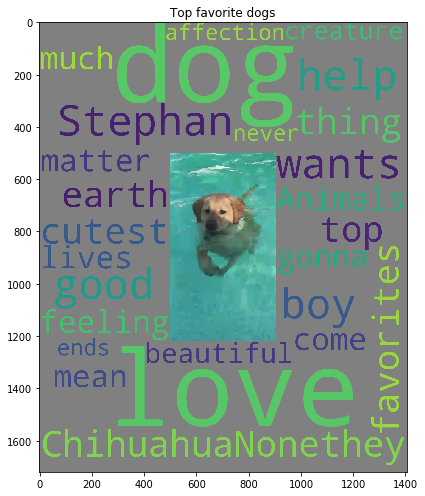

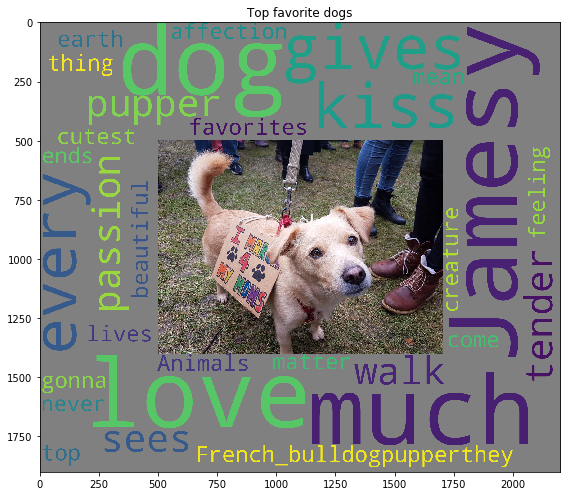

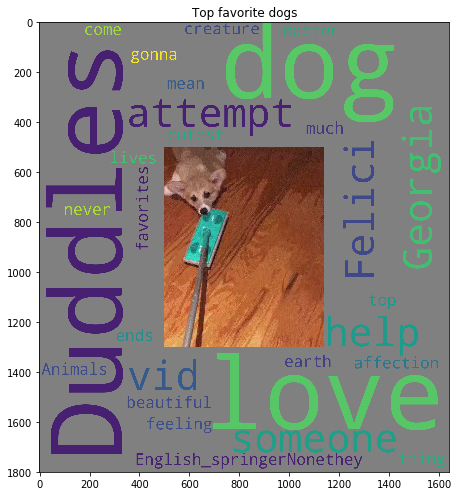

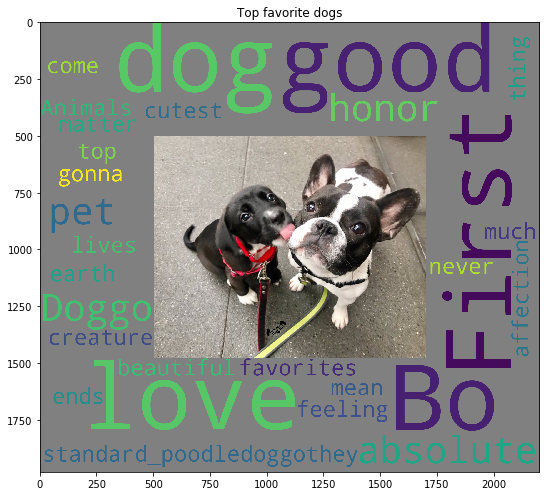

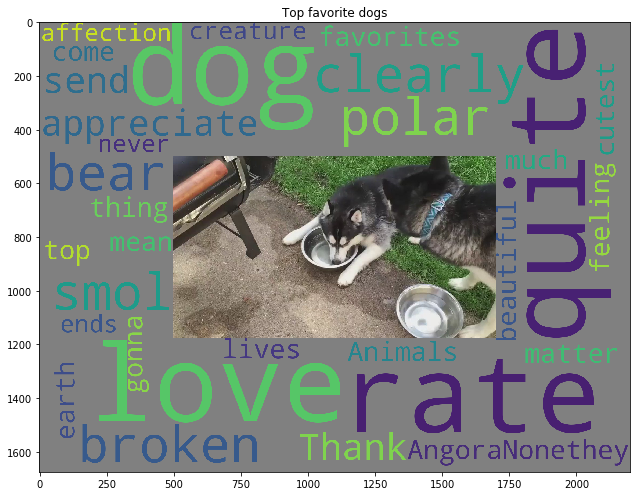

In [38]:
#create a wordcloud with image of top five favorite count dogs
for index,row in new_data.iterrows():
        
    img=Image.open(row['dog_image'])
    #plt.imshow(img)
    #plt.show()
    #blank image
    bln_image=Image.new('RGB',img.size,(255,255,255))
    #plt.imshow(bln_image)
    #plt.show()
    #black border
    img_w_bor=ImageOps.expand(bln_image,border=500,fill='black')
    #plt.imshow(img_w_bor)
    #plt.show()
    

    #masked
    dog_mask=np.array(img_w_bor.copy())
    #wordcloud
    wc=WordCloud(max_words=200,mask=dog_mask,max_font_size=400,random_state=42,relative_scaling=0,background_color='grey')
    #genrate
    plt.figure(figsize=(14.7,8.27))
    #plt.title("most favorite dog")
    text="they all are cutest dogs.here are those dogs which are in top 5 favorites dogs.\
    A dog is the only thing on earth that loves you more than you love yourself.\
    Animals have come to mean so much in our lives No matter how you're feeling, a dog gonna love you.\
    those beautiful creature's affection never ends "
    wc.generate(row['text']+row['pre_breed']+row['stage']+text)
    #plt.imshow(wc)
    #plt.show()
    #open image
    wc.to_file("wc.png")
    wc_img=Image.open('wc.png')
    #paste image
    wc_img.paste(img,(500,500))

    plt.figure(figsize=(14.7,8.27))
    plt.title("Top favorite dogs")
    #show
    plt.imshow(wc_img)
    plt.show()
